<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_581/NGC_581_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 3.7MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 2.6MB 36.6MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=c6d4e07b57e3a7b5a7ac98603b48aebbf792f1e38270de54604daad427d053cb
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC581 center

coordinate = coord.SkyCoord.from_name('NGC581')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (23.34583333, 60.65)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 509862821919372288,509862821919372288,47528498,2015.5,23.342139,1.604631,60.649335,1.924199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.434269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,0,74,3,-1.690774,50.439827,0.000000,0.000000e+00,3,False,0.013024,NaN,NaN,0.064572,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.050758,-1.805004,49.391006,46.257850,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001937
1,1635721458409799680,Gaia DR2 509862821917654528,509862821917654528,1136255935,2015.5,23.348224,0.139566,60.647837,0.177842,-0.117917,0.265819,-0.443600,-0.968698,0.239517,-0.755574,0.333036,-0.344465,0.233086,-0.361592,0.023643,-0.111166,-0.073079,-0.014817,-0.328323,0.382878,-0.534408,431,9,430,1,-0.220854,417.933929,0.000000,0.000000e+00,31,False,0.280584,1.500798,0.040730,-0.014264,...,475.126210,6.379536,74.476608,18.069897,1.413960,0,1.256254,0.423300,0.832954,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.053945,-1.805999,49.393524,46.255003,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002456
2,1635721458409799680,Gaia DR2 509862821917646848,509862821917646848,155749623,2015.5,23.344755,1.478474,60.652509,1.737626,5.535791,2.359475,2.346196,3.956021,2.288899,0.605896,3.020984,0.068784,0.569105,-0.225318,-0.318779,-0.304135,-0.396514,-0.257745,0.012941,0.018103,0.083448,102,0,100,2,2.308400,129.681671,3.333368,1.373995e+00,31,False,0.013662,1.700624,0.358144,0.133700,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051509,-1.801664,49.395005,46.259868,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002566
3,1635721458409799680,Gaia DR2 509862821917646976,509862821917646976,324531031,2015.5,23.344351,0.267437,60.652526,0.315644,1.245240,0.500280,2.489087,-2.935483,0.498879,4.157978,0.617648,-0.325415,0.187524,-0.255984,0.024045,-0.270366,-0.010201,-0.091205,-0.220582,0.272263,-0.549402,435,0,433,2,10.904075,831.817810,2.098145,6.998055e+00,31,False,0.069347,1.523048,0.080300,-0.036152,...,359.104309,5.585718,64.289734,18.373869,1.895344,0,1.528061,0.289089,1.238972,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051310,-1.801679,49.394775,46.259987,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002631
4,1635721458409799680,Gaia DR2 509862821919736832,509862821919736832,10975901,2015.5,23.341592,2.689071,60.651851,3.262242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

##### Applying Filter:

In [6]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [8]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered.pmra_error < 0.3) & (all_stars_filtered.pmdec_error < 0.3)]

In [9]:
all_stars_filtered.shape

(29833, 99)

##### Visualizing GAIA data

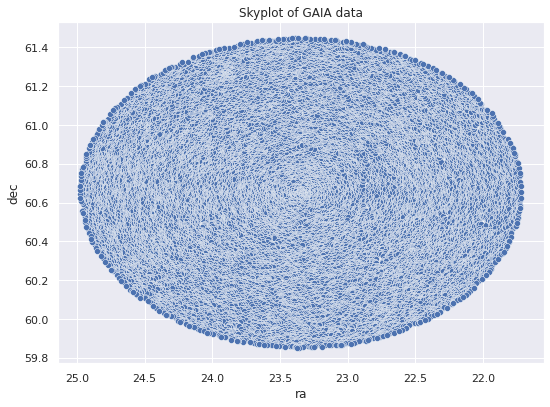

In [10]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [11]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [12]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [13]:
## saving only NGC 581 data from Cantat GAIA DR2 paper

cantat_581 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_581")
cantat_581 = cantat_581[0].to_pandas()
cantat_581

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,23.444496,60.711214,509864230674369664,0.4203,-1.305,-0.111,NaN,17.485600,1.7305,0.1,NGC_581,23.444507,60.711214
1,23.366839,60.571187,509861447535756416,0.3875,-1.400,-0.631,NaN,15.760600,0.8743,0.9,NGC_581,23.366851,60.571189
2,23.139522,60.607261,509850796015034752,0.3732,-0.647,-0.651,NaN,15.411700,1.0211,0.1,NGC_581,23.139527,60.607263
3,23.379967,60.647975,509862169084115200,0.3209,-1.256,-0.624,NaN,17.417801,1.1832,0.3,NGC_581,23.379978,60.647978
4,23.181250,60.669540,509874538595633152,0.3057,-1.849,-0.380,NaN,16.319901,0.8084,0.1,NGC_581,23.181266,60.669541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,23.330910,60.679827,509863028083270656,0.3097,-1.386,-0.559,NaN,11.704800,0.3024,0.6,NGC_581,23.330922,60.679829
302,23.256299,60.768428,509876737611440768,0.4223,-0.963,-0.726,NaN,17.515200,1.3165,0.3,NGC_581,23.256307,60.768431
303,23.491549,60.548354,509858286439769344,0.3422,-1.321,-0.518,NaN,14.846400,0.6234,1.0,NGC_581,23.491561,60.548357
304,23.204670,60.602775,509839079344255744,0.3770,-1.424,-0.456,NaN,14.848400,0.6502,1.0,NGC_581,23.204683,60.602777


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_581 = cantat_581.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_581 = cantat_581.loc[:,['source_id', 'PMemb']]


In [16]:
# join the two table on source_id
cantat_581 = all_stars_filtered.join(cantat_581.set_index('source_id'), on='source_id')

In [17]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_581 = cantat_581.dropna(subset=['PMemb'])
cantat_581

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,15.518390,1.273436,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006025,26.600638,9.164910,0.8
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,10.835787,1.183485,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,49.385656,46.252732,100002,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007321,41.473889,11.277138,0.9
24,1635721458409799680,Gaia DR2 509862821925154816,509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,15.318432,1.270626,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.060497,-1.804416,49.402157,46.251879,100001,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008056,33.754465,4.240307,0.5
32,1635721458409799680,Gaia DR2 509862925004366976,509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,12.589413,1.204519,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.061049,-1.801861,49.405193,46.253437,100001,7708.666504,7395.666504,7998.000000,1.1157,0.7599,1.4716,0.5350

In [18]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_581.to_csv('NGC_581_cantat.csv')
# all_stars.to_csv('NGC_581_Gaia_30m.csv')

In [19]:
cantat_581.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,2.900000e+02,2.900000e+02,2.900000e+02,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,2.880000e+02,288.000000,288.000000,288.000000,288.000000,290.000000,288.000000,288.000000,288.000000,2.000000,2.000000,290.000000,2.000000,2.00000,2.0,290.000000,290.000000,290.000000,290.000000,230.000000,230.000000,230.000000,230.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,290.000000,290.000000,290.000000,290.000000
mean,1.635721e+18,5.098627e+17,8.416266e+08,2015.5,23.338835,0.030821,60.658352,0.035665,0.370212,0.052312,9.211558,-1.385519,0.053763,-0.512812,0.069884,-0.273094,0.137877,-0.439420,0.078064,-0.131670,0.011754,-0.169387,-0.133181,0.210211,-0.501601,440.434483,37.458621,437.137931,3.296552,1.140274,482.812012,0.026174,0.360310,31.0,37.881733,1.582347,0.008702,-0.029970,50.424138,18.989655,...,1.705135e+05,379.286028,616.711670,14.957777,1.256457,0.027586,0.964137,0.388489,0.575648,-49.753553,0.612721,0.137931,5000.000000,3.75000,0.0,128.047705,-1.796305,49.395971,46.266373,100035.852174,5960.888672,5709.863770,6274.312012,1.156244,0.828692,1.443573,0.582131,0.412842,0.727399,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.077927,33.825061,9.690265,0.548966
std,0.000000e+00,8.575887e+12,5.013692e+08,0.0,0.127096,0.016515,0.064280,0.018988,0.054995,0.027820,4.856951,0.238796,0.028661,0.202091,0.036665,0.097456,0.086305,0.065411,0.072730,0.078853,0.078360,0.078169,0.088729,0.070053,0.075897,34.187821,120.074660,34.604662,5.116801,4.912604,201.802109,0.080439,1.330248,0.0,74.743462,0.071796,0.004615,0.028910,3.851406,1.070150,...,1.642842e+06,3034.217687,397.542999,1.677215,0.117661,0.183952,0.361863,0.195735,0.189441,6.258113,0.414016,1.935359,707.106812,1.06066,0.0,0.063817,0.062788,0.084823,0.067624,262.343578,1152.768188,1080.029419,1234.728149,0.381976,0.373124,0.410171,0.193569,0.189571,0.207919,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044722,17.966852,6.073610,0.324569
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,3.005832,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.457754,-0.444580,-0.008753,-0.635927,258.000000,0.000000,248.000000,

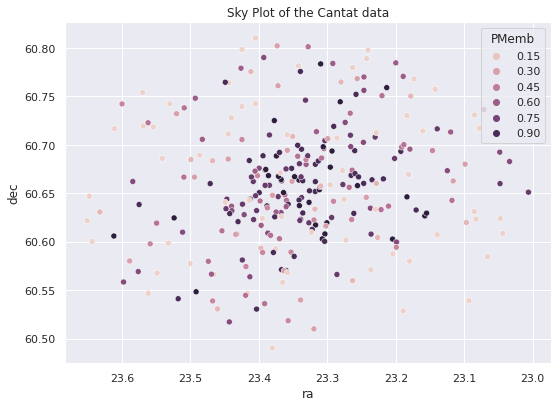

In [20]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_581['ra'], y = cantat_581['dec'], 
                          hue = cantat_581['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [21]:
# import member dataset
member = cantat_581.copy()

In [22]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_581_center'] = distance

In [23]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_581_center)
cantat_radius

0.1664977239990226

In [24]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
12,1635721458409799680,Gaia DR2 509862821924860928,509862821924860928,633282302,2015.5,23.337478,0.032504,60.645589,0.036998,0.391514,0.049985,7.832692,-1.441254,0.054181,-0.608015,0.066342,0.010663,0.146426,-0.514153,-0.074264,-0.111162,-0.197530,-0.187955,-0.152381,0.252359,-0.323488,357,0,347,10,-1.762963,297.325836,0.000000,0.000000,31,False,7.076538,1.565709,0.008847,0.031219,...,0,1.043811,0.403919,0.639892,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.049109,-1.809071,49.385338,46.255876,100001,5205.950195,5034.557617,5423.000000,1.1545,0.8473,1.7941,0.5880,0.4620,0.8451,200111,1.637990,1.509496,1.751413,1.775485,1.277370,2.273600,https://gea.esac.esa.int/data-server/datalink/...,,0.006025,26.600638,9.164910,0.8,0.006020,1
19,1635721458409799680,Gaia DR2 509862821924863488,509862821924863488,932470487,2015.5,23.341247,0.019870,60.643035,0.024019,0.380005,0.033725,11.267860,-1.369121,0.033012,-0.544924,0.048321,-0.243492,0.163789,-0.485935,0.092020,-0.169444,0.051450,-0.237576,-0.191654,0.287241,-0.444537,435,435,409,26,17.204514,1115.602661,0.000000,0.830889,31,True,341.556366,1.708766,0.005375,-0.029852,...,1,0.319294,0.105986,0.213308,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.051347,-1.811291,49.385656,46.252732,100002,8662.500000,8259.333008,8941.750000,0.9250,0.7009,1.1550,0.4630,0.3453,0.5831,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007321,41.473889,11.277138,0.9,0.007319,1
24,1635721458409799680,Gaia DR2 509862821925154816,509862821925154816,925930807,2015.5,23.361931,0.026061,60.648337,0.032305,0.336367,0.047134,7.136433,-1.494240,0.044268,-0.265566,0.062629,-0.312786,0.218644,-0.448860,0.144154,-0.170464,0.039753,-0.124047,-0.195702,0.283219,-0.546814,405,0,405,0,0.768050,421.428711,0.000000,0.000000,31,False,8.744256,1.577236,0.007640,-0.008125,...,0,1.037563,0.402555,0.635008,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.060497,-1.804416,49.402157,46.251879,100001,5192.133301,5022.000000,5594.160156,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.008056,33.754465,4.240307,0.5,0.008064,1
32,1635721458409799680,Gaia DR2 509862925004366976,509862925004366976,1072052803,2015.5,23.363888,0.018620,60.650768,0.022141,0.355835,0.029898,11.901633,-1.447069,0.030611,-0.555126,0.049250,-0.288924,0.238786,-0.463008,0.119037,-0.200423,0.103983,0.003067,-0.195087,0.126300,-0.340303,328,218,323,5,8.853123,596.580688,0.000000,0.000000,31,False,174.132690,1.678987,0.005278,-0.067873,...,0,0.427365,0.135534,0.291831,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.061049,-1.801861,49.405193,46.253437,100001,7708.666504,7395.666504,7998.000000,1.1157,0.7599,1.4716,0.5350,0.3146,0.7280,200111,3.628262,3.370500,3.941872,41.880226,35.

In [25]:
### adding their distance from the center of the clusters

## NGC 581
center = coord.SkyCoord.from_name('NGC581')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_581_center'] = distance

In [26]:
non_member = all_stars_filtered[all_stars_filtered['dist_581_center'] >= 0.7].sample(len(member), random_state = 42)

In [27]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_581_center,member
170099,1635721458409799680,Gaia DR2 509607735223801984,509607735223801984,696828268,2015.5,24.731267,0.025525,60.271018,0.029680,0.135042,0.044795,3.014696,-0.010186,0.047060,0.187374,0.062976,-0.374730,0.108163,-0.415146,0.147325,-0.031938,0.087032,-0.161230,-0.019692,0.047390,-0.604164,608,0,604,4,-1.619822,544.040039,0.0,0.0,31,False,5.887402,1.508004,0.006996,-0.004792,...,1.259491,0,1.220689,0.525961,0.694728,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.791065,-2.059401,49.946592,45.577584,100001,4854.0,4781.390137,4908.5,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.781115,0.216456,2.975349,0.784629,0
170910,1635721458409799680,Gaia DR2 509901266160525440,509901266160525440,165946656,2015.5,24.943570,0.062907,60.671499,0.070991,0.476654,0.105436,4.520773,-0.177807,0.112806,-0.769225,0.144548,-0.466705,-0.040176,-0.520832,0.296231,0.064926,0.227305,-0.212844,-0.021903,0.082663,-0.642239,587,0,584,3,0.467257,594.367798,0.0,0.0,31,False,1.162079,1.535516,0.016443,-0.038653,...,1.311417,0,1.410187,0.607374,0.802813,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.819904,-1.646482,50.371489,45.866271,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.783126,1.576215,5.321592,0.782893,0
139055,1635721458409799680,Gaia DR2 509795408115964160,509795408115964160,1084828353,2015.5,24.586889,0.030180,60.303863,0.034288,0.166194,0.052101,3.189839,-1.191547,0.055817,-0.616498,0.073953,-0.394174,0.090859,-0.400907,0.124858,-0.040215,0.069909,-0.149653,-0.070234,0.106215,-0.624715,616,0,614,2,-0.598452,587.700684,0.0,0.0,31,False,4.333655,1.571037,0.008050,-0.024711,...,1.226249,0,0.917347,0.370420,0.546926,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.714670,-2.040137,49.883277,45.642685,100001,5367.0,4956.786621,5627.0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.702697,21.347551,8.336391,0.705559,0
170772,1635721458409799680,Gaia DR2 509600962051898880,509600962051898880,1314969522,2015.5,24.579156,0.025249,60.158287,0.027964,0.230661,0.045065,5.118351,-0.933088,0.043056,-0.430361,0.057243,-0.428813,0.159992,-0.500870,0.174603,-0.036101,0.108747,-0.161025,-0.111105,0.138363,-0.618884,571,0,567,4,0.231979,569.140747,0.0,0.0,31,False,8.332779,1.616536,0.006219,-0.026148,...,1.244743,0,0.872910,0.328843,0.544067,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,128.737253,-2.184005,49.771083,45.520042,100001,5623.5,5449.830078,5972.0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.782787,21.671384,7.518194,0.786397,0
177357,1635721458409799680,Gaia DR2 510658971417098112,5106589714

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


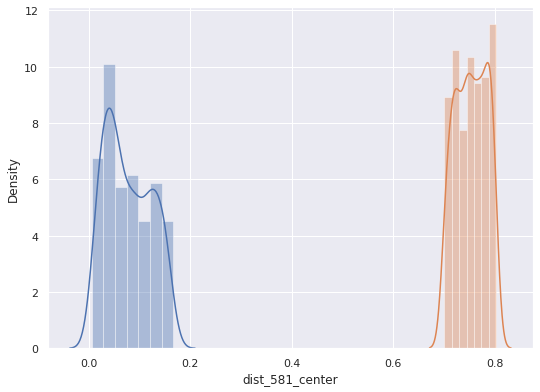

In [28]:
sns.distplot(member['dist_581_center'])
sns.distplot(non_member['dist_581_center'])
plt.show()

In [29]:
training_data = pd.concat([member, non_member])

In [30]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
count,5.800000e+02,5.800000e+02,5.800000e+02,580.0,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02,580.0,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,577.000000,577.000000,577.000000,580.000000,577.000000,577.000000,577.000000,12.000000,12.000000,580.000000,12.000000,12.000000,12.0,580.000000,580.000000,580.000000,580.000000,407.000000,407.000000,407.000000,407.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,260.0,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,580.000000,580.000000,580.000000,290.000000,580.000000,580.000000
mean,1.635721e+18,5.099256e+17,8.541482e+08,2015.5,23.353570,0.038668,60.627607,0.044107,0.550933,0.063772,11.346669,-0.445344,0.068290,-0.700608,0.087531,-0.300397,0.099295,-0.463264,0.113954,-0.079242,0.054064,-0.208620,-0.102900,0.165468,-0.524330,459.608621,29.882759,456.648276,2.960345,1.439872,555.610718,0.053880,1.954727e+00,31.0,28.691904,1.533657,0.010518,-0.031829,52.474138,18.682759,...,591.900696,15.262051,1.291797,0.048276,1.216171,0.525493,0.690678,-61.015117,1.244181,0.324138,5083.333496,3.333333,0.0,128.059582,-1.823223,49.383076,46.237015,100035.479115,5486.283203,5265.743164,5782.735352,1.142562,0.839541,1.438104,0.572869,0.418882,0.724552,200111.0,4.703452,4.279670,5.069355,138.283279,114.696121,161.870392,0.415400,48.025509,19.447717,0.548966,0.415570,0.500000
std,0.000000e+00,2.997487e+14,4.911686e+08,0.0,0.782185,0.025843,0.375041,0.028698,0.786709,0.040407,15.881799,5.941037,0.045842,2.892052,0.056811,0.133724,0.094647,0.074539,0.100877,0.098010,0.107026,0.104645,0.091846,0.089250,0.104489,75.915053,111.388567,75.990844,4.491037,7.565455,1130.859009,0.138439,2.860483e+01,0.0,64.650902,0.092027,0.006766,0.029889,8.561735,1.277970,...,437.768555,1.646332,0.195514,0.230072,0.482949,0.289736,0.230166,30.506504,1.916207,2.427911,792.961487,0.577350,0.0,0.385777,0.373226,0.543937,0.382611,260.523713,1121.116333,1055.697388,1197.634644,0.473210,0.455562,0.505481,0.236632,0.227262,0.256219,0.0,19.879744,18.178495,21.301077,1276.353516,1055.997192,1497.393433,0.339900,83.353126,43.441561,0.324569,0.340074,0.500432
min,1.635721e+18,5.093941e+17,2.885440e+05,2015.5,21.724260,0.009833,59.850662,0.011431,0.069924,0.016428,3.004496,-18.328466,0.017891,-40.099040,0.022449,-0.788991,-0.397933,-0.889755,-0.338155,-0.561038,-0.560800,-0.528360,-0.444580,-0.176306,-0.886571,255.000000,0.000000,235.000000,0.

In [31]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [32]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,580.000000,580.000000,580.000000
mean,0.550933,-0.445344,-0.700608
std,0.786709,5.941037,2.892052
min,0.069924,-18.328466,-40.099041
25%,0.330154,-1.531998,-0.756381
50%,0.388041,-1.364679,-0.511631
75%,0.477269,-0.732881,-0.264749
max,15.472975,104.388641,18.419275


In [33]:
targets.value_counts()

1    290
0    290
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


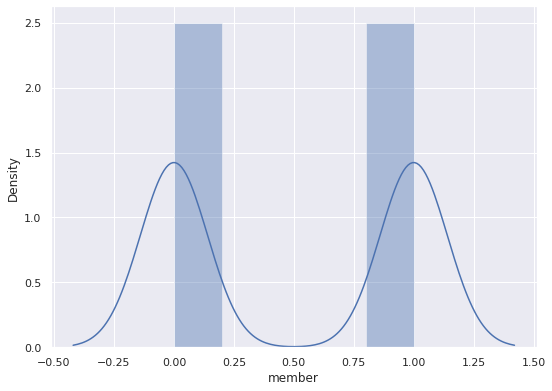

In [34]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

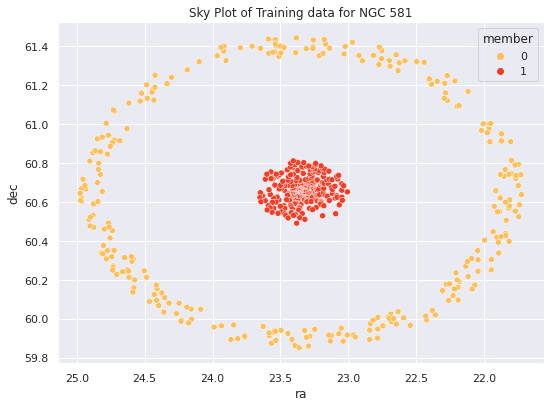

In [35]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 581')
plt.show()

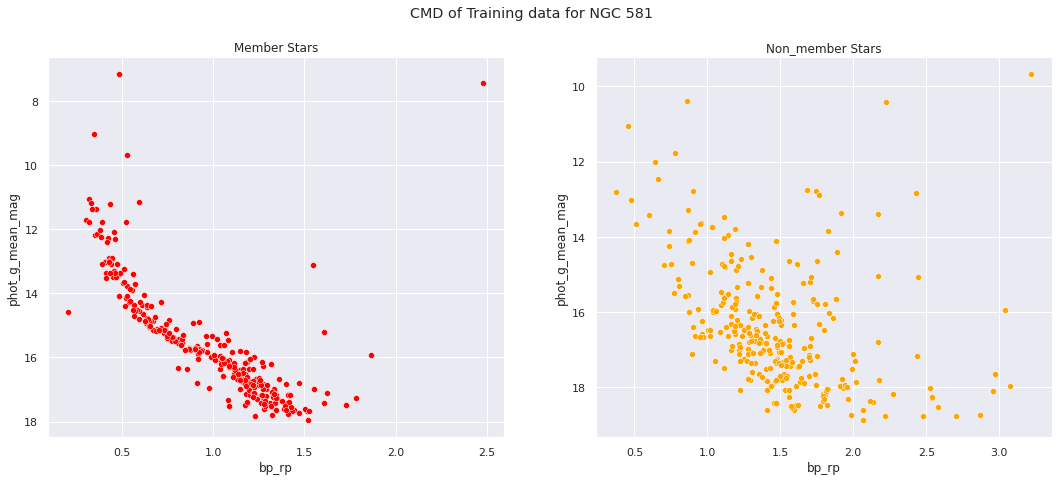

In [36]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 581 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


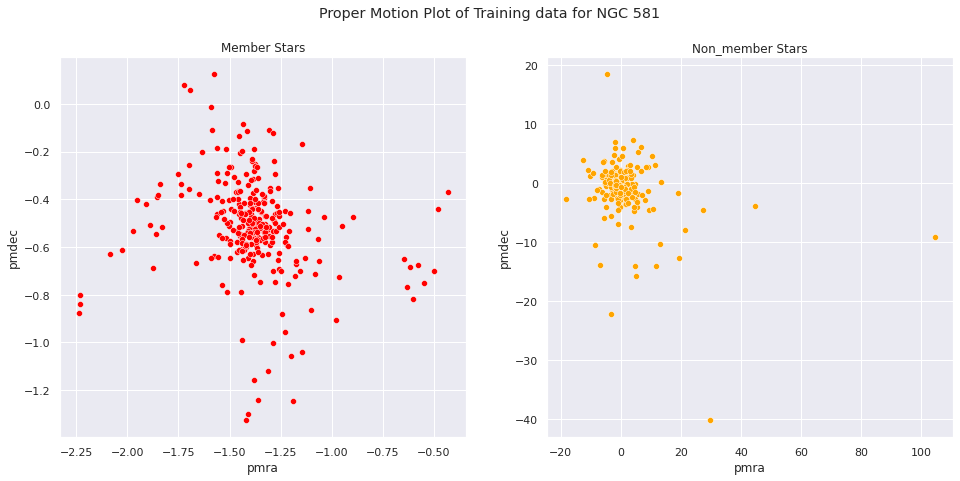

In [37]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 581 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


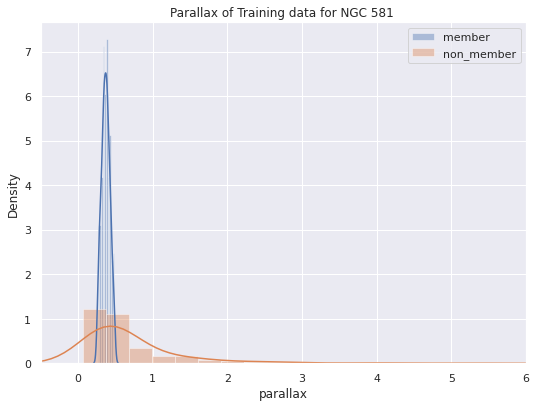

In [38]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 581 ')
plt.legend()
plt.show()

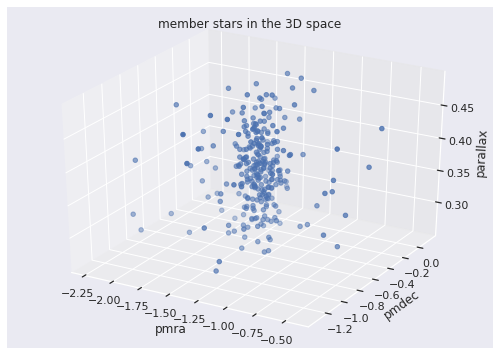

In [39]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


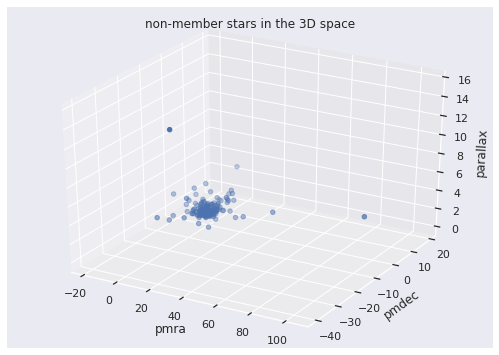

In [40]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [41]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.388666
pmdec       0.326592
parallax    0.284742
dtype: float64

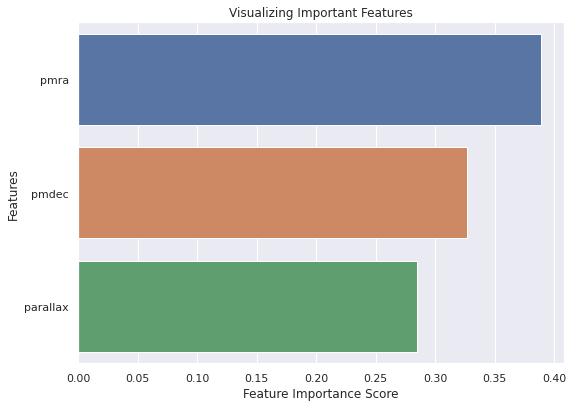

In [43]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [45]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [46]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [47]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [48]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [49]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 369 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.00390625,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 600}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.851
Accuracy on test data: 0.908


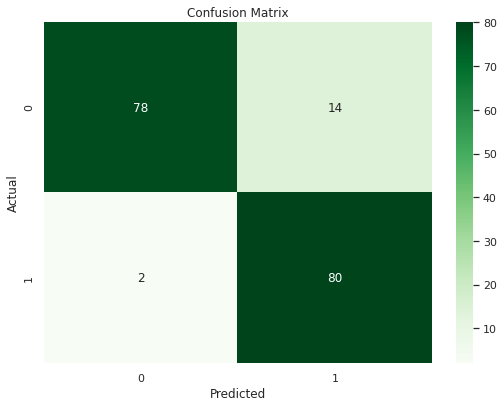

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91        92
           1       0.85      0.98      0.91        82

    accuracy                           0.91       174
   macro avg       0.91      0.91      0.91       174
weighted avg       0.92      0.91      0.91       174



In [51]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.944
Precision on testing data: 0.862
Accuracy on test data: 0.920


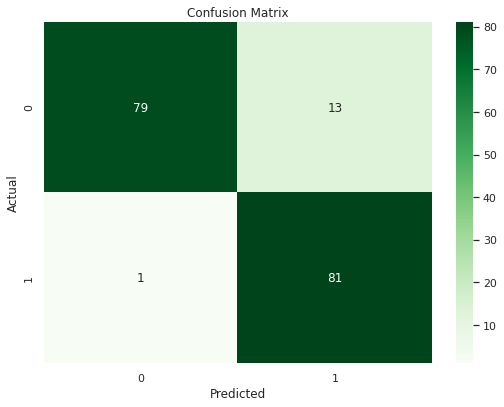

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92        92
           1       0.86      0.99      0.92        82

    accuracy                           0.92       174
   macro avg       0.92      0.92      0.92       174
weighted avg       0.93      0.92      0.92       174



In [52]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [53]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_581_center
count,2.983300e+04,2.983300e+04,2.983300e+04,29833.0,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.0,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,...,2.963400e+04,29634.000000,29634.000000,29634.000000,29634.000000,29833.000000,29634.000000,29637.000000,29634.000000,858.000000,858.000000,29833.000000,858.000000,858.000000,858.000000,29833.000000,29833.000000,29833.000000,29833.000000,18432.000000,18432.000000,18432.000000,18432.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,7564.000000,10796.0,10796.000000,10796.000000,10796.000000,10796.000000,10796.000000,10796.000000,29833.000000,29833.000000,29833.000000,29833.000000
mean,1.635721e+18,5.099889e+17,8.466348e+08,2015.5,23.365615,0.045683,60.647808,0.052037,0.617235,0.075035,11.770172,-0.136317,0.081338,-0.994709,0.104059,-0.305475,0.056290,-0.472558,0.127942,-0.037230,0.074498,-0.231431,-0.079630,0.140768,-0.532101,464.570107,15.172024,461.937083,2.633024,1.553378,576.269104,0.083478,2.689028,31.0,18.313841,1.495455,0.012394,-0.037751,53.003151,18.368116,...,2.822549e+04,46.100056,551.149414,15.631948,1.302818,0.055576,1.400673,0.626043,0.774588,-42.397821,1.508633,0.408675,5105.594238,3.367716,-0.046911,128.061897,-1.802187,49.405750,46.251146,100037.755263,4918.621094,4737.281250,5190.862793,1.147979,0.875897,1.484440,0.570296,0.431354,0.741940,200111.0,3.358614,3.015700,3.621945,19.064951,15.777186,22.352654,0.525807,54.199759,25.923859,0.525817
std,0.000000e+00,3.526879e+14,4.875735e+08,0.0,0.811984,0.029365,0.393630,0.033240,0.662039,0.046872,18.162394,6.459992,0.051986,3.882144,0.065767,0.127055,0.094878,0.074001,0.105571,0.091877,0.107060,0.116578,0.097434,0.094474,0.102465,71.610258,81.600358,71.346224,3.698660,8.438476,1119.757324,0.189458,24.877196,0.0,49.634281,0.075292,0.007930,0.032157,8.124285,1.292102,...,4.319066e+05,672.344074,440.688202,1.456006,0.115418,0.244397,0.395635,0.239321,0.177115,36.404302,1.913803,2.537315,664.737366,0.574380,0.258292,0.397148,0.394677,0.577474,0.392262,268.483343,734.907593,695.526978,789.364319,0.515933,0.484719,0.580872,0.261245,0.242364,0.296641,0.0,6.897602,6.271592,7.410986,261.951569,220.272964,303.923859,0.192223,143.087725,64.911038,0.192240
min,1.635721e+18,5.093905e+17,5.827000e+03,2015.5,21.715170,0.008443,59.850394,0.009909,0.068970,0.014476,3.00

In [54]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_581_center'] <= cantat_radius*2]

In [55]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [56]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [57]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [58]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    4619
1     525
Name: member, dtype: int64

In [59]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

525

In [60]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

525

In [61]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_581_center,member,PMemb
count,5.250000e+02,5.250000e+02,5.250000e+02,525.0,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,5.250000e+02,525.0,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,...,524.000000,524.000000,524.000000,525.000000,524.000000,524.000000,524.000000,10.000000,10.000000,525.000000,10.000000,10.00000,10.0,525.000000,525.000000,525.000000,525.000000,359.000000,359.000000,359.000000,359.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,199.0,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,525.000000,525.000000,525.000000,525.000000,525.0,525.000000
mean,1.635721e+18,5.098568e+17,8.639856e+08,2015.5,23.374202,0.036271,60.654825,0.041418,0.357813,0.061734,7.654905,-1.300665,0.064160,-0.509909,0.082582,-0.283490,0.110749,-0.430311,0.082086,-0.112458,0.029727,-0.196947,-0.133396,0.203617,-0.513141,458.824762,15.249524,456.272381,2.552381,0.633481,487.909821,0.031191,7.438270e-01,31.0,22.131672,1.548999,0.010063,-0.035963,52.304762,18.539048,...,565.983215,15.497491,1.264088,0.020952,1.122560,0.472620,0.649940,-38.649919,1.621989,0.238095,5300.000000,3.50000,0.0,128.065235,-1.796596,49.414821,46.254341,100040.027855,5494.798340,5269.560059,5785.870605,1.155554,0.848084,1.482009,0.577728,0.418513,0.748783,200111.0,3.424148,3.050596,3.748444,21.748655,18.053276,25.444046,0.239031,26.990980,8.298400,0.239019,1.0,0.797455
std,0.000000e+00,5.375987e+13,4.776057e+08,0.0,0.348311,0.019225,0.180251,0.021760,0.056910,0.031757,4.491957,0.388708,0.033277,0.269614,0.042633,0.091086,0.082146,0.074259,0.078300,0.077993,0.079864,0.101196,0.101444,0.089678,0.079326,36.255083,81.775250,35.713075,3.532242,4.757965,276.051880,0.082644,6.452171e+00,0.0,54.588577,0.066606,0.005239,0.031792,4.073569,1.177435,...,402.170166,1.342192,0.058617,0.143362,0.325371,0.170295,0.164004,36.453647,0.709315,1.732733,537.483826,0.57735,0.0,0.168834,0.182068,0.259317,0.171676,276.920373,964.054504,904.463867,1029.339722,0.452398,0.441835,0.498384,0.231264,0.220393,0.259231,0.0,3.083078,2.727720,3.303078,84.976341,71.325294,98.644615,0.067826,17.392930,6.726836,0.067812,0.0,0.133468
min,1.635721e+18,5.097856e+17,9.151498e+06,2015.5,22.691278,0.009860,60.324937,0.011448,0.261081,0.016178,3.019518,-2.117048,0.017003,-1.342202,0.022416,-0.710997,-0.160714,-0.696001,-0.246654,-0.365116,-0.326226,-0.498084,-0.434729,-0.058535,-0.766491,293.000000,0.000000,293.000000,0.000000,-7.862045,251.828323,0.000000,0.0

In [62]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
count,2.900000e+02,2.900000e+02,2.900000e+02,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,288.000000,288.000000,288.000000,290.000000,288.000000,288.000000,288.000000,2.000000,2.000000,290.000000,2.000000,2.00000,2.0,290.000000,290.000000,290.000000,290.000000,230.000000,230.000000,230.000000,230.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0
mean,1.635721e+18,5.098627e+17,8.416266e+08,2015.5,23.338835,0.030821,60.658352,0.035665,0.370212,0.052312,9.211558,-1.385519,0.053763,-0.512812,0.069884,-0.273094,0.137877,-0.439420,0.078064,-0.131670,0.011754,-0.169387,-0.133181,0.210211,-0.501601,440.434483,37.458621,437.137931,3.296552,1.140274,482.812012,0.026174,0.360310,31.0,37.881733,1.582347,0.008702,-0.029970,50.424138,18.989655,...,616.711670,14.957777,1.256457,0.027586,0.964137,0.388489,0.575648,-49.753553,0.612721,0.137931,5000.000000,3.75000,0.0,128.047705,-1.796305,49.395971,46.266373,100035.852174,5960.888672,5709.863770,6274.312012,1.156244,0.828692,1.443573,0.582131,0.412842,0.727399,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.077927,33.825061,9.690265,0.548966,0.077924,1.0
std,0.000000e+00,8.575887e+12,5.013692e+08,0.0,0.127096,0.016515,0.064280,0.018988,0.054995,0.027820,4.856951,0.238796,0.028661,0.202091,0.036665,0.097456,0.086305,0.065411,0.072730,0.078853,0.078360,0.078169,0.088729,0.070053,0.075897,34.187821,120.074660,34.604662,5.116801,4.912604,201.802109,0.080439,1.330248,0.0,74.743462,0.071796,0.004615,0.028910,3.851406,1.070150,...,397.542999,1.677215,0.117661,0.183952,0.361863,0.195735,0.189441,6.258113,0.414016,1.935359,707.106812,1.06066,0.0,0.063817,0.062788,0.084823,0.067624,262.343578,1152.768188,1080.029419,1234.728149,0.381976,0.373124,0.410171,0.193569,0.189571,0.207919,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044722,17.966852,6.073610,0.324569,0.044719,0.0
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,3.005832,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.457754,-0.444580,-0.008753,-0.635927,258.000000,0.000000,248.000000,0.000000,-5.932523,285.132050,0.000000,0.000000,3

#### Visualization

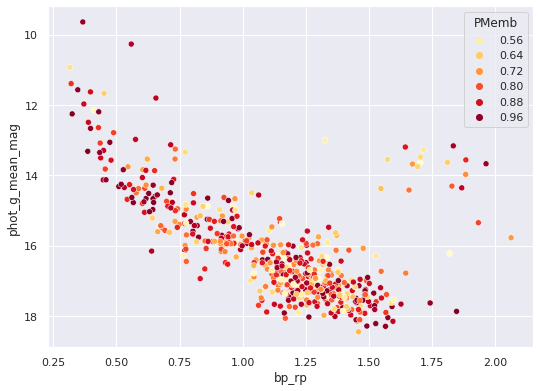

In [63]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

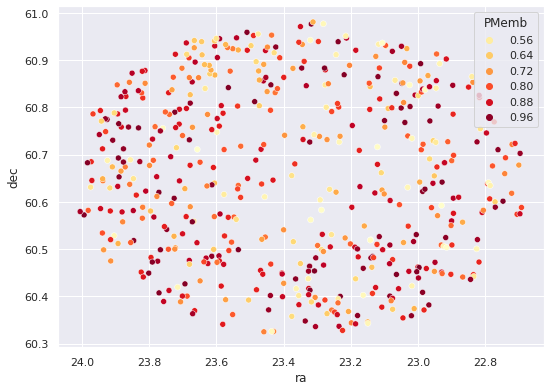

In [64]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

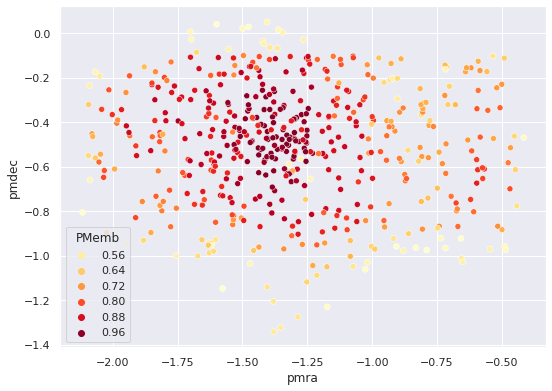

In [65]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


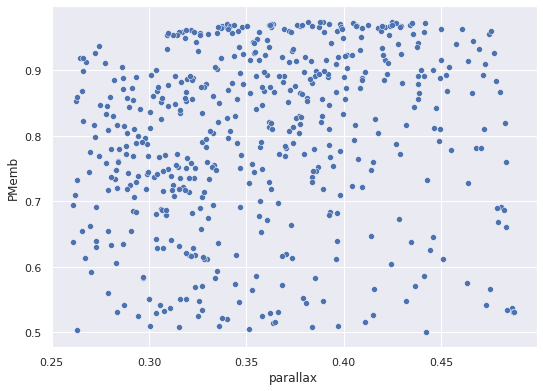

In [66]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [67]:
# saving the files as csv
# all_stars.to_csv('gaia_581_membership_prob.csv')

potentialMember.to_csv('NGC_581_membership_prob.csv')


### Comparing the old and new predicted members

In [68]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [69]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_581_center,member,PMemb
count,8.150000e+02,8.150000e+02,8.150000e+02,815.0,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,8.150000e+02,815.0,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,...,812.000000,812.000000,812.000000,815.000000,812.000000,812.000000,812.000000,12.000000,12.000000,815.000000,12.000000,12.000000,12.0,815.000000,815.000000,815.000000,815.000000,589.000000,589.000000,589.000000,589.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,815.000000,815.000000,815.000000,815.000000,815.0,815.000000
mean,1.635721e+18,5.098589e+17,8.560296e+08,2015.5,23.361617,0.034332,60.656080,0.039371,0.362225,0.058381,8.208805,-1.330859,0.060461,-0.510942,0.078064,-0.279790,0.120402,-0.433552,0.080655,-0.119294,0.023332,-0.187140,-0.133319,0.205963,-0.509035,452.280982,23.152147,449.463804,2.817178,0.813812,486.095703,0.029406,6.073609e-01,31.0,27.735991,1.560865,0.009579,-0.033830,51.635583,18.699387,...,583.975769,15.306062,1.261382,0.023313,1.066371,0.442780,0.623590,-40.500525,1.453778,0.202454,5250.000000,3.541667,0.0,128.058998,-1.796492,49.408114,46.258622,100038.397284,5676.802246,5441.495605,5976.604004,1.155842,0.839996,1.465979,0.579564,0.416148,0.739865,200111.0,4.215020,3.807298,4.578467,109.184334,90.515785,127.852867,0.181706,29.422738,8.793664,0.181697,1.0,0.709036
std,0.000000e+00,4.352798e+13,4.860054e+08,0.0,0.290035,0.018482,0.149617,0.020986,0.056515,0.030730,4.681934,0.345199,0.032082,0.247580,0.041041,0.093476,0.084601,0.071330,0.076344,0.078791,0.079750,0.094530,0.097056,0.083242,0.078272,36.588667,97.656893,36.472040,4.177828,4.816669,252.032043,0.081852,5.240326e+00,0.0,62.917774,0.070293,0.005065,0.030913,4.093917,1.160017,...,401.025604,1.491305,0.084429,0.158916,0.346932,0.184071,0.176948,33.309109,0.762607,1.806892,543.557312,0.620056,0.0,0.140947,0.150794,0.214300,0.143629,271.103712,1065.453369,999.286743,1138.296997,0.423494,0.413741,0.462992,0.215867,0.207641,0.238877,0.0,16.638399,15.184703,17.849054,1101.623291,911.450256,1292.380859,0.098122,17.890387,6.532278,0.098112,0.0,0.251076
min,1.635721e+18,5.097856e+17,2.885440e+05,2015.5,22.691278,0.009833,60.324937,0.011431,0.261081,0.016178,3.005832,-2.238286,0.017003,-1.342202,0.022416,-0.710997,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.498084,-0.444580,-0.058535,-0.766491,258.000000,0.000000,248.000000,0.000000,-7.862045,251.82832

In [70]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_581_center,member
count,2.900000e+02,2.900000e+02,2.900000e+02,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,288.000000,288.000000,288.000000,290.000000,288.000000,288.000000,288.000000,2.000000,2.000000,290.000000,2.000000,2.00000,2.0,290.000000,290.000000,290.000000,290.000000,230.000000,230.000000,230.000000,230.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0
mean,1.635721e+18,5.098627e+17,8.416266e+08,2015.5,23.338835,0.030821,60.658352,0.035665,0.370212,0.052312,9.211558,-1.385519,0.053763,-0.512812,0.069884,-0.273094,0.137877,-0.439420,0.078064,-0.131670,0.011754,-0.169387,-0.133181,0.210211,-0.501601,440.434483,37.458621,437.137931,3.296552,1.140274,482.812012,0.026174,0.360310,31.0,37.881733,1.582347,0.008702,-0.029970,50.424138,18.989655,...,616.711670,14.957777,1.256457,0.027586,0.964137,0.388489,0.575648,-49.753553,0.612721,0.137931,5000.000000,3.75000,0.0,128.047705,-1.796305,49.395971,46.266373,100035.852174,5960.888672,5709.863770,6274.312012,1.156244,0.828692,1.443573,0.582131,0.412842,0.727399,200111.0,5.257293,4.804547,5.672334,224.414108,186.012711,262.815460,0.077927,33.825061,9.690265,0.548966,0.077924,1.0
std,0.000000e+00,8.575887e+12,5.013692e+08,0.0,0.127096,0.016515,0.064280,0.018988,0.054995,0.027820,4.856951,0.238796,0.028661,0.202091,0.036665,0.097456,0.086305,0.065411,0.072730,0.078853,0.078360,0.078169,0.088729,0.070053,0.075897,34.187821,120.074660,34.604662,5.116801,4.912604,201.802109,0.080439,1.330248,0.0,74.743462,0.071796,0.004615,0.028910,3.851406,1.070150,...,397.542999,1.677215,0.117661,0.183952,0.361863,0.195735,0.189441,6.258113,0.414016,1.935359,707.106812,1.06066,0.0,0.063817,0.062788,0.084823,0.067624,262.343578,1152.768188,1080.029419,1234.728149,0.381976,0.373124,0.410171,0.193569,0.189571,0.207919,0.0,25.092531,22.910463,26.920807,1670.491211,1382.027100,1959.851074,0.044722,17.966852,6.073610,0.324569,0.044719,0.0
min,1.635721e+18,5.098375e+17,2.885440e+05,2015.5,23.006206,0.009833,60.490512,0.011431,0.262340,0.016720,3.005832,-2.238286,0.017891,-1.324815,0.022449,-0.561925,-0.296259,-0.724833,-0.289966,-0.461236,-0.364343,-0.457754,-0.444580,-0.008753,-0.635927,258.000000,0.000000,248.000000,0.000000,-5.932523,285.132050,0.000000,0.000000,3

In [71]:
concatenated.dataset.value_counts()

New_member    525
Old_member    290
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

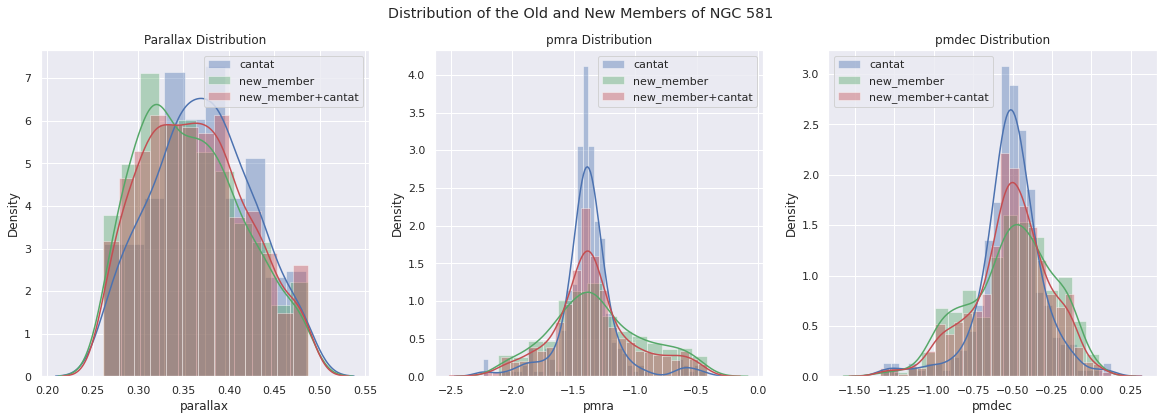

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members of NGC 581')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


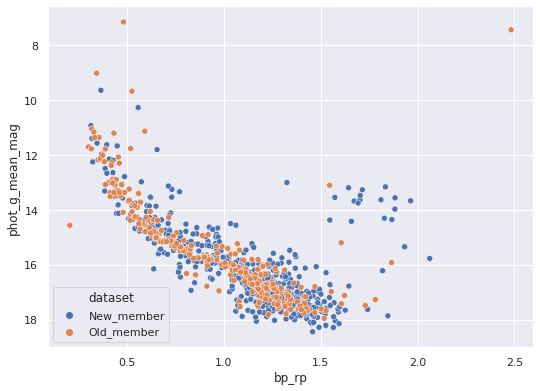

In [73]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

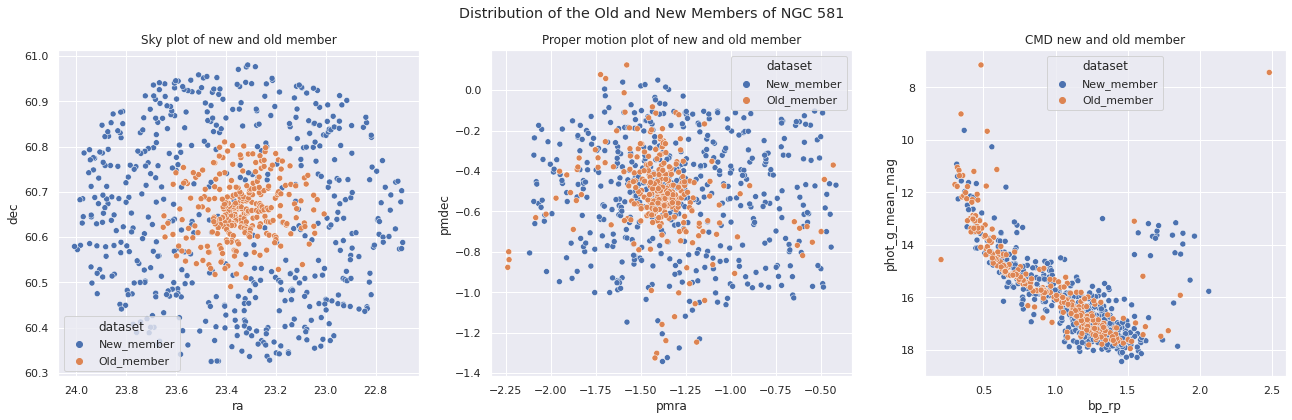

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members of NGC 581')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
skyplot.invert_xaxis()
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD new and old member')

plt.show()

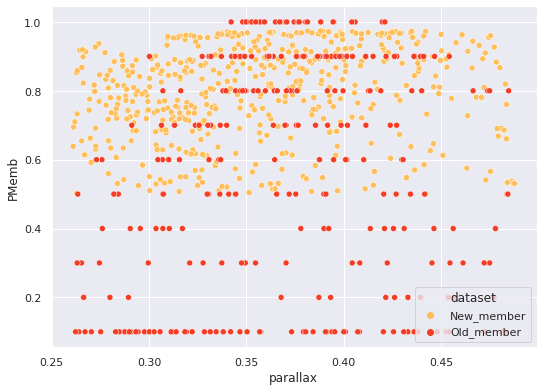

In [75]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [76]:
# pd_prof.ProfileReport(potentialMember)

In [77]:
#files.download('NGC_581_cantat.csv')

#files.download('NGC_581_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


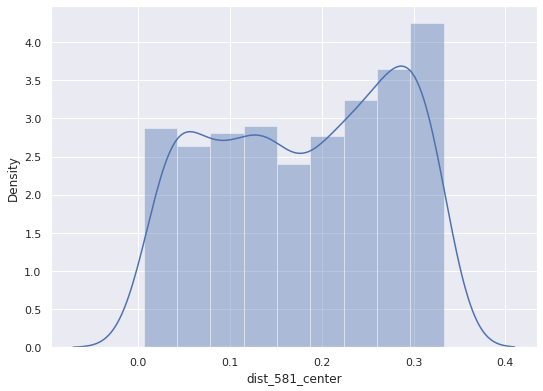

In [78]:
sns.distplot(concatenated['dist_581_center'])

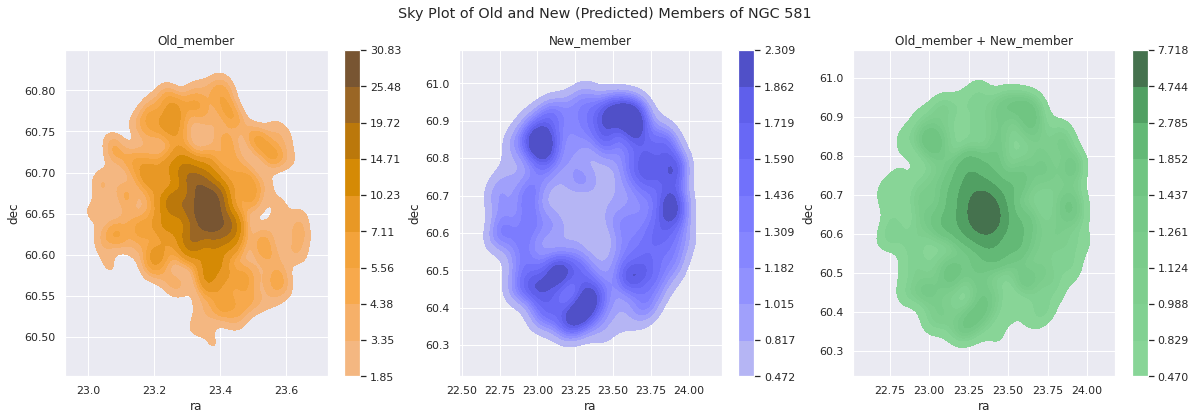

In [79]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 581')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

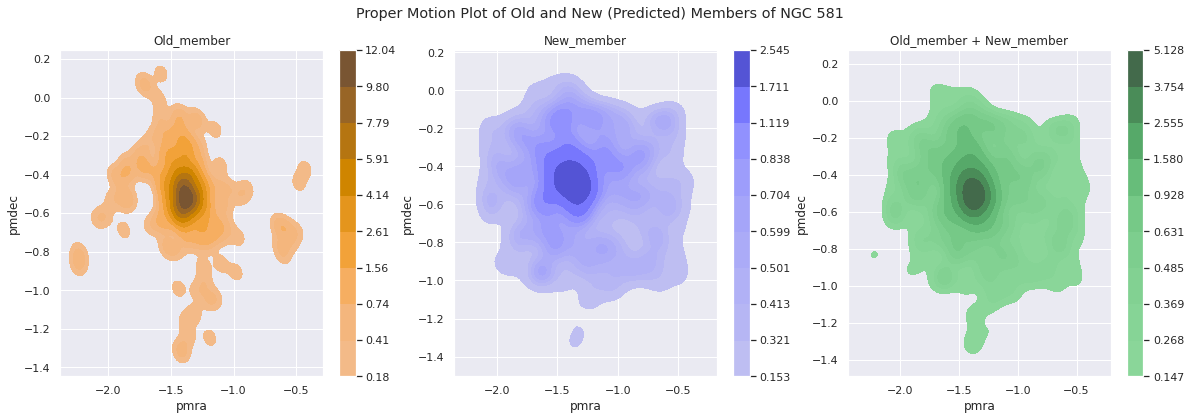

In [80]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 581')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [81]:
#files.download('NGC_581_cantat.csv')

potentialMember.to_csv('NGC_581_additional_member_prob.csv')
concatenated.to_csv('NGC_581_all_member_prob.csv')

files.download('NGC_581_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_581_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>